In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import ufloat
from uncertainties.umath import atan2

In [11]:
from scipy.optimize import curve_fit

# during raw measurements

### 3.1

In [2]:
# get the RF gen. input voltages
def get_V_in(Vout, gain):
    f = gain/20
    denom = 10**f
    return Vout/denom
# get in mVpp
# 33.78 for 24V
Vin_500mW = get_V_in(14.16*10**3, 33.72) #gain is by 23V and 98.80 (AOM central freq: 80 MHz)
Vin_1000mW = get_V_in(20*10**3, 33.72)
Vin_2000mW = get_V_in(28.3*10**3, 33.72)
print(Vin_500mW, Vin_1000mW, Vin_2000mW)

291.78519571903206 412.1259826540001 583.1582654554102


In [3]:
# 3.1 bragg angle
AOM_mes_dist = ufloat(9.5, 0.2) + ufloat(15.0, 0.2)  + ufloat(32.3, 0.2) # in cm
order_dist = ufloat(0.7,0.1) # in cm
theta = atan2(order_dist,AOM_mes_dist)
bragg = theta/2
bragg * 1000 #in mrad

6.16165990016459+/-0.8809497076100029

### 3.2

In [4]:
# 3.2
# without RF power
IL = 1 - (ufloat(0.858, 0.001)/ufloat(0.904, 0.001))
IL

0.05088495575221241+/-0.0015251128970142295

raw_data_3_2 = np.array([[get_V_in(28.3*10**3, 33.72), ufloat(0.728,0.001) - power_noise, ufloat(59.6e-3,0.2e-3) - power_noise],
                         [get_V_in(25.2*10**3, 33.72), ufloat(0.769,0.001) - power_noise, ufloat(20.4e-3,0.2e-3) - power_noise],
                         [get_V_in(22.4*10**3, 33.72), ufloat(0.775,0.001) - power_noise, ufloat(26.3e-3,0.2e-3) - power_noise],
                         [get_V_in(20*10**3, 33.72), ufloat(0.746,0.001) - power_noise, ufloat(64.7e-3,0.2e-3)- power_noise], 
                         [get_V_in(17.83*10**3, 33.72), ufloat(0.691,0.001) - power_noise, ufloat(126.0e-3,0.2e-3) - power_noise],
                         [get_V_in(15.89*10**3, 33.72), ufloat(0.621,0.001) - power_noise, ufloat(0.202,0.001) - power_noise],
                         [get_V_in(14.16*10**3, 33.72), ufloat(0.546,0.001) - power_noise, ufloat(0.282,0.001) - power_noise],
                         [get_V_in(12.62*10**3, 33.72), ufloat(0.469,0.001) - power_noise, ufloat(0.361,0.001) - power_noise],
                         [get_V_in(11.25*10**3, 33.72), ufloat(0.399,0.001) - power_noise, ufloat(0.437,0.001) - power_noise],
                         [get_V_in(10.02*10**3, 33.72), ufloat(0.331,0.001) - power_noise, ufloat(0.504,0.001) - power_noise],
                         [get_V_in(8.93*10**3, 33.72), ufloat(0.274,0.001) - power_noise, ufloat(0.561,0.001) - power_noise],
                         [get_V_in(7.96*10**3, 33.72), ufloat(0.225,0.001) - power_noise, ufloat(0.611,0.001) - power_noise],
                         [get_V_in(7.10*10**3, 33.72), ufloat(0.183,0.001) - power_noise, ufloat(0.650,0.001) - power_noise],
                        [get_V_in(6.32*10**3, 33.72), ufloat(0.148,0.001) - power_noise, ufloat(0.686,0.001) - power_noise]])

In [5]:
#3.2
# with RF power change and record the power
power_noise = ufloat(0.65e-3,0.05e-3)
RF_power_watt = np.array([2.00, 1.58, 1.26, 1.00, 0.794, 0.631, 0.501, 0.398, 0.316, 0.250, 0.200, 0.158, 0.126,0.100])
raw_data_3_2 = np.array([[RF_power_watt[0], ufloat(0.728,0.001) - power_noise, ufloat(59.6e-3,0.2e-3) - power_noise],
                         [RF_power_watt[1], ufloat(0.769,0.001) - power_noise, ufloat(20.4e-3,0.2e-3) - power_noise],
                         [RF_power_watt[2], ufloat(0.775,0.001) - power_noise, ufloat(26.3e-3,0.2e-3) - power_noise],
                         [RF_power_watt[3], ufloat(0.746,0.001) - power_noise, ufloat(64.7e-3,0.2e-3)- power_noise], 
                         [RF_power_watt[4], ufloat(0.691,0.001) - power_noise, ufloat(126.0e-3,0.2e-3) - power_noise],
                         [RF_power_watt[5], ufloat(0.621,0.001) - power_noise, ufloat(0.202,0.001) - power_noise],
                         [RF_power_watt[6], ufloat(0.546,0.001) - power_noise, ufloat(0.282,0.001) - power_noise],
                         [RF_power_watt[7], ufloat(0.469,0.001) - power_noise, ufloat(0.361,0.001) - power_noise],
                         [RF_power_watt[8], ufloat(0.399,0.001) - power_noise, ufloat(0.437,0.001) - power_noise],
                         [RF_power_watt[9], ufloat(0.331,0.001) - power_noise, ufloat(0.504,0.001) - power_noise],
                         [RF_power_watt[10], ufloat(0.274,0.001) - power_noise, ufloat(0.561,0.001) - power_noise],
                         [RF_power_watt[11], ufloat(0.225,0.001) - power_noise, ufloat(0.611,0.001) - power_noise],
                         [RF_power_watt[12], ufloat(0.183,0.001) - power_noise, ufloat(0.650,0.001) - power_noise],
                         [RF_power_watt[13], ufloat(0.148,0.001) - power_noise, ufloat(0.686,0.001) - power_noise]])
#[get_V_in(0*10**3, 33.72), ufloat(0,0), ufloat(0.820,0.001) - power_noise]]
data_3_2 = pd.DataFrame(raw_data_3_2, columns=["RF_power/Watt", "power_1st/mW", "power_0th/mW"])
data_3_2

,RF_power/Watt,power_1st/mW,power_0th/mW
0,2.0,0.7273+/-0.0010,0.05895+/-0.00021
1,1.58,0.7683+/-0.0010,0.01975+/-0.00021
2,1.26,0.7743+/-0.0010,0.02565+/-0.00021
3,1.0,0.7453+/-0.0010,0.06405+/-0.00021
4,0.794,0.6903+/-0.0010,0.12535+/-0.00021
5,0.631,0.6203+/-0.0010,0.2014+/-0.0010
6,0.501,0.5454+/-0.0010,0.2813+/-0.0010
7,0.398,0.4683+/-0.0010,0.3604+/-0.0010
8,0.316,0.3984+/-0.0010,0.4364+/-0.0010
9,0.25,0.3304+/-0.0010,0.5033+/-0.0010


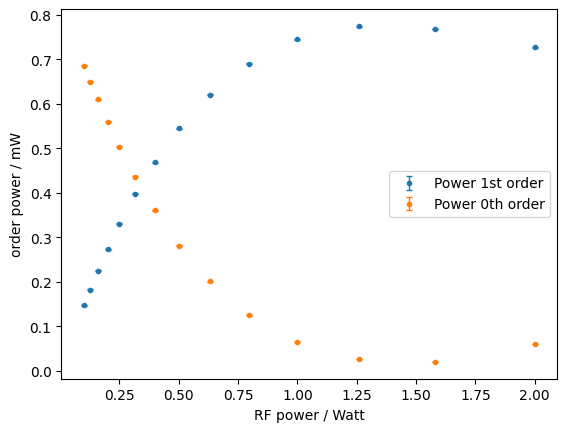

In [7]:
#plt.style.use('seaborn-v0_8-paper')
#sns.set_theme(style="whitegrid")
#plt.figure(figsize=(8,4))
plt.errorbar(np.array([data_3_2["RF_power/Watt"][i] for i in range(len(data_3_2["RF_power/Watt"]))]), 
        np.array([data_3_2["power_1st/mW"][i].n for i in range(len(data_3_2["power_1st/mW"]))]),
            yerr=np.array([data_3_2["power_1st/mW"][i].s for i in range(len(data_3_2["power_1st/mW"]))]),markersize=6,
             fmt=".", elinewidth=1, capsize=2,
            label="Power 1st order")
plt.errorbar(np.array([data_3_2["RF_power/Watt"][i] for i in range(len(data_3_2["RF_power/Watt"]))]), 
        np.array([data_3_2["power_0th/mW"][i].n for i in range(len(data_3_2["power_0th/mW"]))]),
            yerr=np.array([data_3_2["power_0th/mW"][i].s for i in range(len(data_3_2["power_0th/mW"]))]),markersize=6,
             fmt=".", elinewidth=1, capsize=2,
            label="Power 0th order")
plt.xlabel("RF power / Watt")
plt.ylabel("order power / mW")
plt.legend(loc='center right')
#plt.savefig("plots/power_order.png", dpi=500)
plt.show()

In [24]:
# fit function to get epsilon
def epsilon(RF_power, Sat_power):
    norm_power = RF_power/Sat_power
    return np.sin((np.pi/2) * np.sqrt(norm_power))**2
epsilon_data = data_3_2["power_1st/mW"]/ufloat(0.858, 0.001)
epsilon_data

0     0.8477+/-0.0015
1     0.8955+/-0.0016
2     0.9025+/-0.0016
3     0.8687+/-0.0015
4     0.8046+/-0.0015
5     0.7230+/-0.0014
6     0.6356+/-0.0014
7     0.5459+/-0.0013
8     0.4643+/-0.0013
9     0.3850+/-0.0013
10    0.3186+/-0.0012
11    0.2615+/-0.0012
12    0.2125+/-0.0012
13    0.1717+/-0.0012
Name: power_1st/mW, dtype: object

In [27]:
# performing fit
popt, pcov = curve_fit(epsilon, np.array([data_3_2["RF_power/Watt"][i] for i in range(len(data_3_2["RF_power/Watt"]))]), 
         np.array([epsilon_data[i].n for i in range(len(epsilon_data))]))
popt[0]

1.4278944396733801

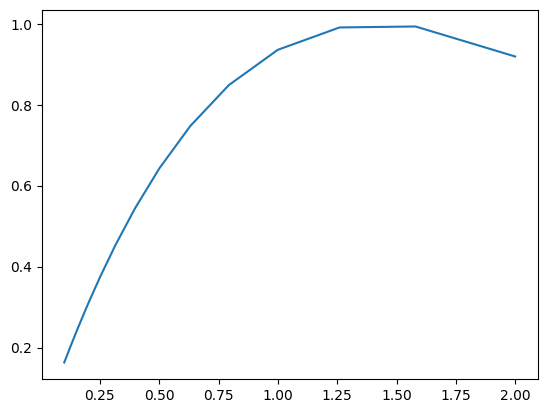

In [26]:
RF_power = np.array([data_3_2["RF_power/Watt"][i] for i in range(len(data_3_2["RF_power/Watt"]))])
plt.plot(RF_power, epsilon(RF_power,popt[0]))